<div style= "text-align:center">
    <span style = "font-size:30px;border-bottom:2px solid green"><b>Exploratory Data Analysis(EDA) - Mini Project</b></span><br>
</div>

<div> 
    <span style = "font-size:16px;border-bottom:1.5px dashed">What is Exploratory Data Analysis(EDA) ?</span><br>
</div><br>

EDA is a Preprocessing step That Helps Us to Understand, Clean, and summarize<br>
The Data So We can Analyse The dataset more Effectively<br><br>

##### <span style="border-bottom: 1.5px dashed">Main four steps that we want to perform in Exploratory Data Analysis(EDA)</span><br>

- Handling Missing Values <b>--></b> in this step we identify and manage all <u><b>Null or Missing values</b></u> in the Dataset.<br><br>
- Outlier Detection & Removal <b>--></b> outliers are extreme values that dont fit the normal pattern of the data they can affect the ML model<br>so we need to detect it using <u><b>IQR method</b></u> or using <u><b>BOXPLOT</b></u> and treat them properly<br><br>
- Encoding Categorical Variables <b>--></b> since ML model can't understand Text data we need to convert categorical column to numerical formats using <u><b>LabelEncoding</b></u> or <u><b>OnehotEncoding</b></u><br><br>
- Feature Scaling<b>--></b> in this step We scale the Numerical Features(columns) to bring all values in to a similar range.<br>so the ML model will treats all Features Equally. we can use <u><b>MinMaxScaler</b></u> or <u><b>Standard Scaler</b></u> for scaling the Features  

<span style = " font-size:16px;border-bottom:1px solid green">I will use the <b>VideoGame Sales With Ratings</b> Dataset and apply key EDA steps , Handling missing values, Outlier detection and removal , Encoding and Scaling features to clean and prepare dataset</span>

<hr>

### <span style = "border-bottom:1px dashed"><b>1.</b> Importing Libraries and Loading Dataset</span>

In [16]:
# To hide unwanted warning messages
import warnings
warnings.filterwarnings("ignore", category=FutureWarning) 

# Essential Libraries for EDA
import pandas as pd              # for handling data
import numpy as np               # for numerical operations
import matplotlib.pyplot as plt  # for creating basic charts
import seaborn as sns            # for creating better visualized charts
from sklearn.preprocessing import LabelEncoder, MinMaxScaler  # for encoding and scaling

### <span style= "border-bottom:1px solid green">Loading dataset</span>

In [17]:
data = pd.read_csv("/home/jishnu/Desktop/ Data_Sets/Video_Games_Sales_as_at_22_Dec_2016.csv") # orginal dataset

##### I am making a copy of the original dataset to ensure the original data set remains unchanged all EDA steps will be performed on this copied version


### <span style= "border-bottom:1px solid green">Dataset copied Version</span>

In [18]:
df = data.copy() # copied version

### <span style="border-bottom:1px dashed"><b>2.</b> Understanding the Dataset</span>

in this step i am going to explore the basic structure of the dataset including.<br>
- number of rows and columns
- informations about the dataset
- presence of any missing values
- statistical summary of the dataset 

In [19]:
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
df.rename(columns = {"Genre":"Game_category","Rating":"Age_Rating"},inplace = True) # renamed for better readebility

In [21]:
#number of rows and columns
print(f"shape of the dataset: {df.shape}\n")

# basic information 
print(df.info())

# checking for missing values
print("\nMissing values in each column")
print(f"{df.isnull().sum()}\n")

# checkig for duplicate values
print(f"Number of Duplicate values = {df.duplicated().sum()}\n")

# statistical summary of numerical columns
df.describe()

shape of the dataset: (16719, 16)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Game_category    16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Age_Rating       9950 non-null   object 
dtypes: float64(9), object(7

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
count,16450.000000,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,8137.000000,8137.000000,7590.000000
mean,2006.487356,0.263330,0.145025,0.077602,0.047332,0.533543,68.967679,26.360821,162.229908
std,5.878995,0.813514,0.503283,0.308818,0.186710,1.547935,13.938165,18.980495,561.282326
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,10.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,21.000000,24.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,81.000000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,10665.000000


#### <span style = "border-bottom:1px solid">visualization of missing values</span>

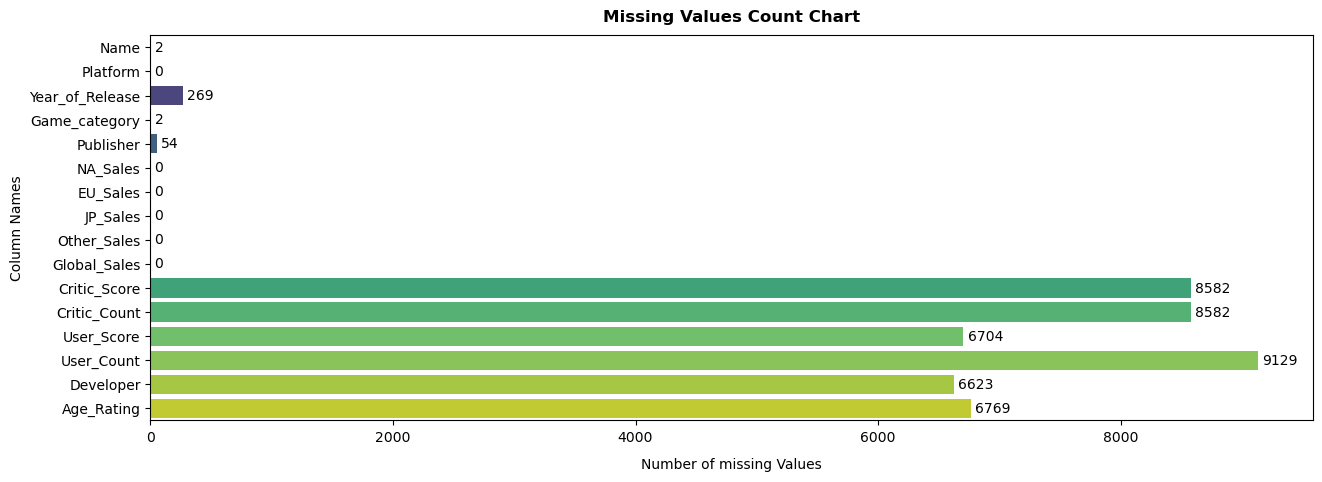

In [22]:
missing = df.isnull().sum()

plt.figure(figsize = (15,5))
ax = sns.barplot(x=missing.values,y=missing.index, palette = "viridis")
plt.title("Missing Values Count Chart",fontweight = "bold",pad=10)
plt.xlabel("Number of missing Values",labelpad = 10)
plt.ylabel("Column Names")

for i in ax.containers:  # this line will loop through actual bars and add the value to the edge using bar_label
    ax.bar_label(i, label_type='edge', padding=3) # label_type will ensure the value will on the edge of the bar

plt.show()

<div style="text-align:center">
    <span style = "border-bottom:1px solid; font-size:20px;">Observation & Conclusion</span>
</div><br>
<span style = "font-size:15px">From my observation the dataset contains <b>10 columns</b> with missing values. <b>Six</b> Categorical columns and <b>Four</b> Numeric columns containing Null values, There is no duplicate rows present in the data set so filling missing values is the best approach instead of dropping them</span><br><br>

<span style = "font-size:19px;border-bottom:1px solid;">Notted Issues</span><br>
<ul>
    <li><b style="border-bottom:1px solid red">Year of Release</b> column is in float format, it should be in Int format logically year doesnt have decimal points</li>
    <li><b style="border-bottom:1px solid red">User Score</b> column is currently in object format , its a numeric column so need to be in Numeric format</li>
</ul>

<span style = "border-bottom:1px solid green;font-size:25px">Handling Null Values & Noted Issues</span><br>
- User Score is a numeric column but is listed as object type. this happens because there is atleast one string value in the column. pandas treat the entier column as object in such case. so we need to identify and replace these values before filling missing values

In [23]:
df["User_Score"].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [24]:
df["User_Score"].replace("tbd",np.nan, inplace = True)

In [25]:
df["User_Score"] = pd.to_numeric(df["User_Score"])

In [26]:
df["User_Score"].dtype

dtype('float64')

In [27]:
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Game_category', 'Publisher',
       'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales',
       'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count', 'Developer',
       'Age_Rating'],
      dtype='object')

- Next ploting histogram for numeric columns to understand their distribution and deside how to treat missing values in each column
- if its equaly distributed i can use mean to fill the value if its not i will use median to fill the values

In [28]:
col1 = ["Name","Game_category","Publisher","Developer","Age_Rating"] # object columns with missing values
col2 = ["Year_of_Release","Critic_Score","Critic_Count","User_Score","User_Count"] # numeric columns with missing values

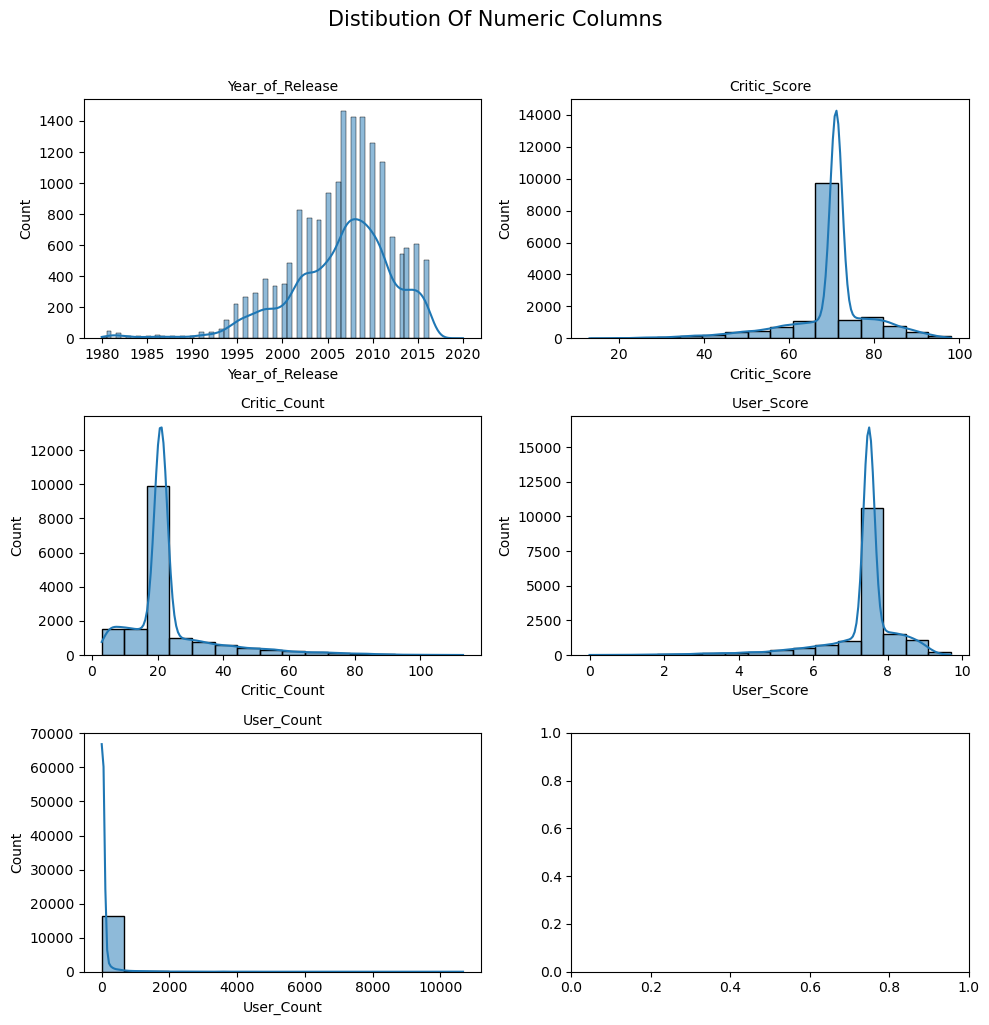

In [60]:
fig,axs = plt.subplots(3,2, figsize=(10,10))
axs = axs.flatten()
for i in range(5):
    sns.histplot(data = df, x = col2[i] , kde = True, ax = axs[i])
    axs[i].set_title(col2[i],fontsize = 10)
plt.suptitle("Distibution Of Numeric Columns",fontsize=15,y=1.02)
plt.tight_layout()
plt.show()

- The numeric columns are not equally distributed so missing values will be filled using the <b>Median</b> instead of the Mean to avoid being skewed by outliers
- Mean is sensitive to extreme values if filling values in a skewed data with mean those values might be higher or lower than the actual data so in this case filling with <b>Median</b> is the right choice
- for categorical column the best way is filling them with most frequent values <b>Mode</b>

In [30]:
# categorical filling
for i in col1:
    df[i] = df[i].fillna(df[i].mode()[0])
    
#numeric filling
for j in col2:
    df[j] = df[j].fillna(df[j].median())

In [31]:
print("\nMissing values in Each column after filling")
print("---------------------------------------------")
print(f"{df.isnull().sum()}\n")


Missing values in Each column after filling
---------------------------------------------
Name               0
Platform           0
Year_of_Release    0
Game_category      0
Publisher          0
NA_Sales           0
EU_Sales           0
JP_Sales           0
Other_Sales        0
Global_Sales       0
Critic_Score       0
Critic_Count       0
User_Score         0
User_Count         0
Developer          0
Age_Rating         0
dtype: int64



In [32]:
df["Year_of_Release"] = df["Year_of_Release"].astype(int) # fixing the notted issue of year column as float

In [33]:
df["Year_of_Release"].dtype

dtype('int64')

In [34]:
print(f"Number of Duplicate Values after Handling Null Values = {df.duplicated().sum()}")

Number of Duplicate Values after Handling Null Values = 0


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16719 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16719 non-null  int64  
 3   Game_category    16719 non-null  object 
 4   Publisher        16719 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     16719 non-null  float64
 11  Critic_Count     16719 non-null  float64
 12  User_Score       16719 non-null  float64
 13  User_Count       16719 non-null  float64
 14  Developer        16719 non-null  object 
 15  Age_Rating       16719 non-null  object 
dtypes: float64(9), int64(1), object(6)
memory usage: 2.0+ MB


<span style = "border-bottom:1px solid green;font-size:25px">Outlier Detection & Removal</span><br>

- <b>Outliers</b> are extremely high or low values in the dataset. detecting and removing them helps keep the dataset clean and make the analysis more effective
- For Detecting Outliers <b>BoxPlot</b> is the most effective ways to visualize them. so in next step visuallize numerical columns to detect outliers in the dataset
- In this step i am going to use IQR method to filter out extremely high or low values from the dataset.

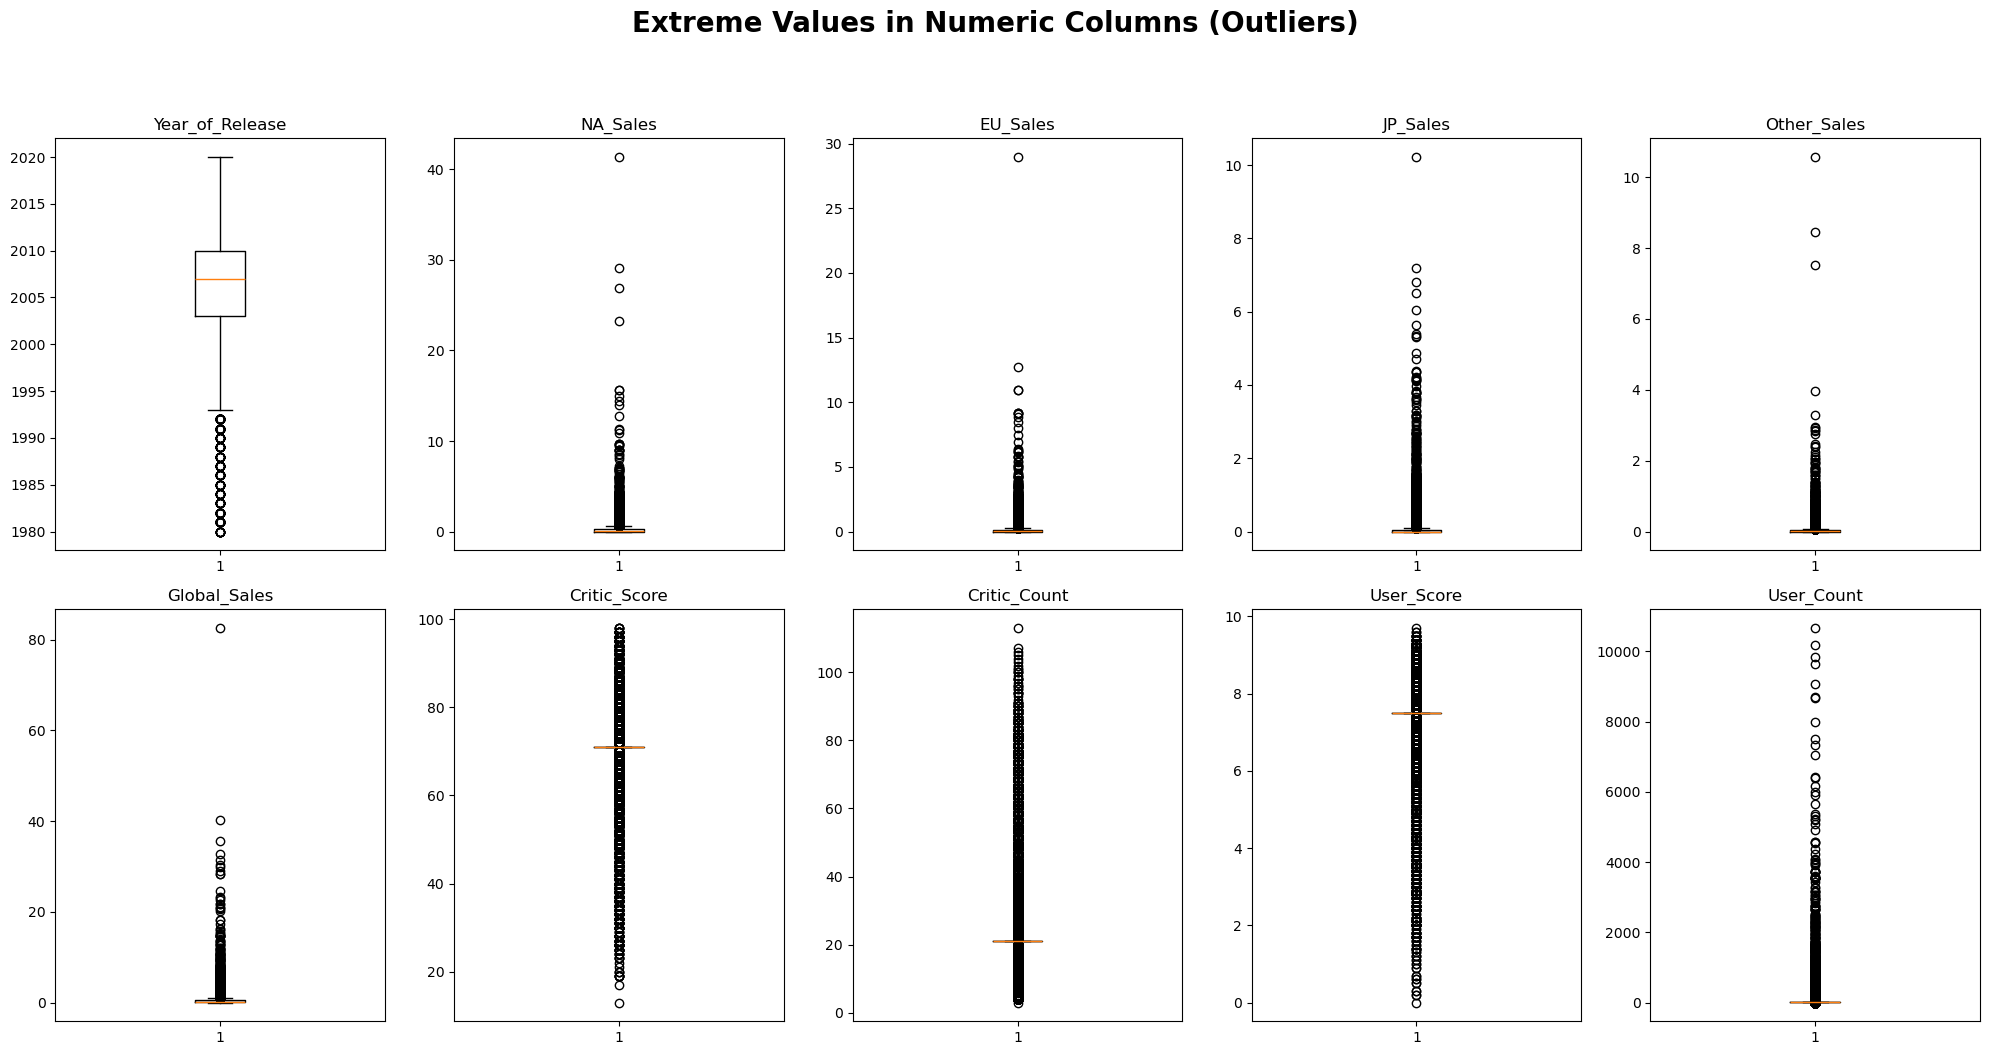

In [58]:
col3 = df.select_dtypes(["float","int"])

fig,axs = plt.subplots(2,5,figsize = (20,10))
axs = axs.flatten()

for i in range(10):
    axs[i].boxplot(df[col3.columns[i]])
    axs[i].set_title(col3.columns[i])
plt.suptitle("Extreme Values in Numeric Columns (Outliers)",fontsize=20,fontweight="bold",y=1.05)
plt.tight_layout()
plt.show()

- From this visualization each numeric column has outliers removing them can make dataset more cleaner and improve the overall data quality
- The next step i am going to filter the outliers using <b>IQR</b> method and remove them carefully.in this case i have 10 numeric columns<br> so i am going to define a function that can filter the outliers because i can reuse the function for each column without writing the IQR<br> method for each column<br>

#### <span style ="border-bottom:1px dotted">Defining a function to detect outliers</span>